In [1]:
# Please execute this cell (shift+<Return>) before starting the workbook
# this should print out "Your notebook is ready to go"
from IPython.display import HTML, SVG, display
import genealogical_analysis_workshop

workshop = genealogical_analysis_workshop.setup()
display(HTML(workshop.css))
print("Your notebook is ready to go")

Your notebook is ready to go


# Getting started with `tskit`

The `tskit` library is an extensive software library that can be used to deal with population-scale genomic data. It does so by providing methods to store and analyse genetic genealogies and ancestral recombination graphs (ARGs). This workbook provides a number of programming exercises to complete using `tskit`, some of which have associated questions to test your understanding. Exercises are marked like this:

<dl>
<dt>Exercise XXX</dt>
<dd>Here is an exercise: normally there will be a code cell below this box for you to work in</dd>
</dl>

Genetic genealogies in the form of tree sequences can be obtained by simulation or inference from real data. In the next practical we shall explore both methods. However, for the time being, we will simply work with two pre-existing tree sequences, firstly one from a simple simulation of selection on a 1Mb section of genome and then one inferred from a large human dataset.
<div class="alert alert-block alert-info">
    <b>Note:</b> This workbook uses the tskit <a href="https://tskit.dev/tskit/docs/stable/python-api.html#sec-python-api">Python API</a> so assumes a basic knowledge of Python, but it's also possible to
<a href="https://tskit.dev/tutorials/tskitr.html">use R</a>, or access the API in other languages, notably
<a href="https://tskit.dev/tskit/docs/stable/c-api.html#sec-c-api">C</a> and <a href="https://github.com/tskit-dev/tskit-rust">Rust</a>.
</div>



In [2]:
import tskit
ts = tskit.load("simulated.trees")
print("Loaded the tree sequence into a variable called `ts`")

Loaded the tree sequence into a variable called `ts`


In a Jupyter notebook, the output of the final command in a cell is output to screen.
When a tree sequence instance is output in this way, a nicely formatted summary should be printed out. Try it below:

In [3]:
# Display `ts` to the screen (formatted nicely in a Jupyter notebook)
ts

## Tree sequence attributes

Various useful properties of the tree sequence have been printed out above, such as the number of trees, the number of sample nodes (i.e. sampled genomes), the sequence length (conventionally interpreted as the number of base pairs), etc. They are available as Python attributes:

In [4]:
print(ts.num_trees, "trees")
print(ts.num_samples, "sample nodes (i.e. sampled genomes)")
print("Sequence length is", ts.sequence_length, "bp")

40 trees
20 sample nodes (i.e. sampled genomes)
Sequence length is 1000000.0 bp


The summary above also prints information on the basic entities in the tree sequence, such as nodes and edges, sites and mutations, and individuals and populations, which are stored in [tables](https://tskit.dev/tutorials/tables_and_editing.html#correspondence-between-tables-and-trees).

<dl><dt>Exercise 1</dt>
<dd>Modify the code cell below to print out not just the number of nodes, but also the number of edges, sites and mutations (and check it corresponds to the counts reported in the summary above).</dd></dl>

In [5]:
# Exercise 1: modify me
print("Tree sequence has", ts.num_nodes, "nodes, of which", ts.num_samples, 'are "sample nodes"')

Tree sequence has 73 nodes, of which 20 are "sample nodes"


In [6]:
workshop.Q1()

## Tree sequence entities

<code>Tskit</code> provides some helpful methods for accessing information about the basic entities in a tree sequence. For example <code>ts.node(7)</code> will return a <a href="https://tskit.dev/tskit/docs/stable/python-api.html#tskit.Node">node object</a> that contains information about node 7, whereas <code>ts.nodes()</code> will iterate over all the node objects in the tree sequence.

Similarly, <code>ts.site(9)</code> will return a single <a href="">site object</a> and <code>ts.sites()</code> with iterate over all the sites.

<dl><dt>Exercise 2</dt>
<dd>Use the tree sequence `.site()` method to look at sites 11 and 12</dd>
</dl>

In [7]:
# Exercise 2: print out the site object for site 11 and again for site 12


In [8]:
workshop.Q2()

### Getting hold of a tree

The trees in a tree sequence are constructed from the nodes and edges. There are a few different ways to access a tree from the tree sequence, all of which return a <a href="https://tskit.dev/tskit/docs/stable/python-api.html#tskit.Tree">Tree</a> object. When output in a notebook, a summary of the tree is shown, rather than the tree itself plotted (which can be unwieldy for tree sequences of thousands of samples).

In [9]:
ts.first()  # The first tree in the tree sequence (tree number 0)

In [10]:
ts.at(100000) # The tree at position 100Kb: this is tree number 6 (i.e. it is the 7th tree)

In [11]:
tree = ts.last()
print(f"The last tree (index {tree.index}) covers bases {tree.interval.left} to {tree.interval.right}\n")

# The `breakpoints` method is a quick way to get the genomic positions ("intervals") of all the trees
print(f"The breakpoints along the genome between the {ts.num_trees} trees are at the following positions:")
print(f" {ts.breakpoints(as_array=True)}")


The last tree (index 39) covers bases 921732.0 to 1000000.0

The breakpoints along the genome between the 40 trees are at the following positions:
 [      0.   39366.   66037.   68538.   88551.   89394.   99631.  137647.
  141520.  145073.  180647.  182618.  191711.  258560.  269834.  295761.
  318254.  466668.  471046.  560552.  584923.  586637.  605902.  612420.
  617792.  626766.  636180.  669823.  697438.  727683.  758854.  770001.
  788668.  821418.  847434.  908601.  908604.  910965.  912828.  921732.
 1000000.]


## Visualising a tree

To visualise the tree topology you can use either text or Scalable Vector Graphic (SVG) format:

In [12]:
tree = ts.first()
print(tree.draw_text())  # Text format: numbers are node IDs, branch lengths are not particularly meaningful

                         63                      
              ┏━━━━━━━━━━━┻━━━━━━━━━━━┓          
              ┃                      45          
              ┃                 ┏━━━━━┻━━━━┓     
              ┃                44          ┃     
              ┃             ┏━━━┻━━━┓      ┃     
              ┃             ┃       ┃     40     
              ┃             ┃       ┃   ┏━━┻━━┓  
              ┃            39       ┃   ┃     ┃  
              ┃         ┏━━━┻━━━┓   ┃   ┃     ┃  
             38         ┃       ┃   ┃   ┃     ┃  
         ┏━━━━┻━━━┓     ┃       ┃   ┃   ┃     ┃  
        36        ┃     ┃       ┃   ┃   ┃     ┃  
      ┏━━┻━━┓     ┃     ┃       ┃   ┃   ┃     ┃  
      ┃     ┃     ┃    35       ┃   ┃   ┃     ┃  
      ┃     ┃     ┃  ┏━━┻━┓     ┃   ┃   ┃     ┃  
      ┃     ┃     ┃  ┃    ┃    34   ┃   ┃     ┃  
      ┃     ┃     ┃  ┃    ┃   ┏━┻┓  ┃   ┃     ┃  
      ┃     ┃     ┃  ┃    ┃   ┃  ┃  ┃  33     ┃  
      ┃     ┃     ┃  ┃    ┃   ┃  ┃  ┃ ┏━┻┓    ┃  


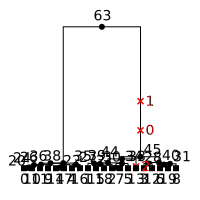

In [13]:
svg_text = tree.draw_svg()  
display(SVG(svg_text))  # plot an SVG string in a Jupyter notebook

In the SVG format, the nodes are marked in black and numbered by node ID. Squares are used for nodes whose genomes we have sampled.
Mutations, on the other hand, are plotted as red crosses, with the red mutation ID beside them.
<div class="alert alert-block alert-info"><b>Note:</b>
Often in these trees, the terminal branches are very short, and the height of the nodes is best plotted on a log scale. This can be done using <code>draw_svg(..., time_scale="log_time")</code>. You can try this above if you like.
    
Many other formatting options are possible, some of which we use below. To look at the help for a function like `draw_svg()` you can type `help(tskit.Tree.draw_svg)` or `?tskit.Tree.draw_svg` in a jupyter notebook, or examine the documentation <a href="https://tskit.dev/tskit/docs/stable/python-api.html#tskit.Tree.draw_svg">here</a>. The <a href="https://tskit.dev/tutorials/viz.html">visualization tutorial</a> also gives more guidance. 
</div>

<dl><dt>Exercise 3</dt>
<dd>Plot the first tree in SVG format, and underneath it plot the tree at position 400 Kb, adding the following parameters to each `draw_svg()` call to produce nicer formatting:

* `size=(500, 250)` – to plot the SVG 500 pixels wide and 250 pixels high
* `y_axis=True` – to show a y (time) axis
* `y_ticks=[0, 100, 200, 500, 1000, 2000]` – to use nice tick marks on the y axis

</dd></dl>

In [14]:
# Exercise 3: use draw_svg() to create two SVG trees (the first in the tree sequence and the one at
# position 400Kb), and plot them by calling display(SVG(...)) twice. They should look quite different


In [15]:
workshop.Q3()

<dl><dt>Exercise 4</dt>
<dd>You can find details of a particular node (e.g. node 9) using <code>ts.node(9)</code>. Use this to find the age of the root (i.e. oldest) node shown in first tree. 
<div class="alert alert-block alert-info"><b>Tip:</b>
    You can check that you have the right node ID by using <code>tree.root</code>.</div>
</dd></dl>

In [16]:
# Exercise 4: print out the age (in generations ago) of the oldest node in the first tree


In [17]:
workshop.Q4()

Alternatively, you could have printed out the underlying *node table* and looked up the times there. You can get a read-only view of the tables that underly a tree sequence by using the `.tables` attribute:

In [18]:
ts.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,b''
1,1,0,0,0.00000000,b''
2,1,0,1,0.00000000,b''
3,1,0,1,0.00000000,b''
4,1,0,2,0.00000000,b''
5,1,0,2,0.00000000,b''
6,1,0,3,0.00000000,b''
7,1,0,3,0.00000000,b''
8,1,0,4,0.00000000,b''
9,1,0,4,0.00000000,b''


## Visualising entire tree sequences

It is also possible to plot out all the trees in a tree sequence. When a tree sequence is plotted like this, alternate background shading is used to indicate the region covered by each tree, and by default an x-axis is plotted, with the ticks below showing the breakpoints between trees, and ticks above showing sites with their mutations (red fleches).

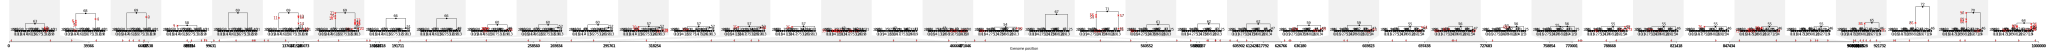

In [19]:
svg_text = ts.draw_svg()
display(SVG(svg_text))

However, even in this small tree sequence, plotting out all the trees is a bit unwieldy, and if you have many more samples or trees, this sort of plot quickly becomes overwhelming.

One way to reduce the amount of data being plotted is to visualise only a restricted region of the sequence, for instance only the middle of the genome (e.g. between 400 and 600 Kb, which only contains 6 trees). When plotting in SVG format, this can be done by using the `x_lim` parameter (you can ignore the other parameters used below, which are simply to aid formatting)

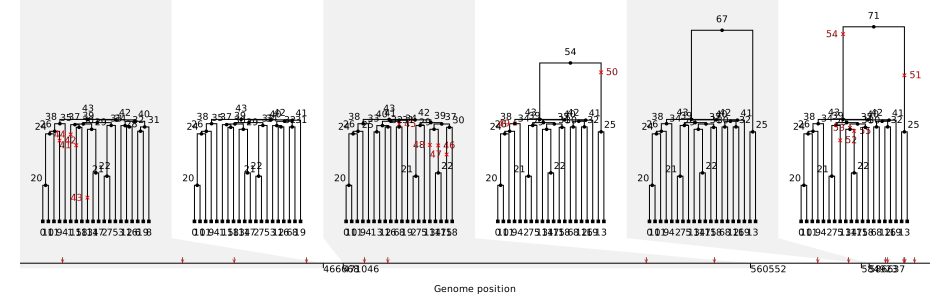

In [20]:
svg_text = ts.draw_svg(
    x_lim=(400_000, 600_000),  # Display 400..600 Kb only
    size=(950, 300),
    time_scale="log_time",

    # Parameters below are simply used to improve the layout, and can be ignored for the moment
    root_svg_attributes={"class": workshop.small_class},
    style=workshop.small_style,
)
display(SVG(svg_text))

Instead of using `x_lim`, if you want to work with only the trees in that restricted region, you can create a new tree sequence by deleting genealogical information to the right and left:

After deleting flanking information, the tree sequence now has only 8 trees, 44 nodes and 15 sites.


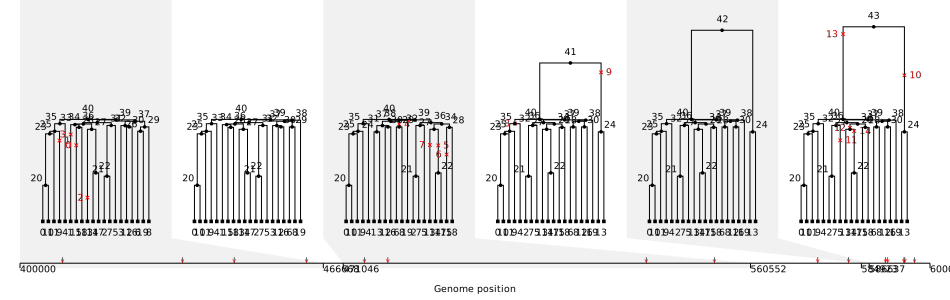

In [21]:
deleted_data_ts = ts.delete_intervals([[0, 400_000], [600_000, 1000_000]])

print(
    "After deleting flanking information, the tree sequence now has only",
    deleted_data_ts.num_trees,
    "trees,",
    deleted_data_ts.num_nodes,
    "nodes and",
    deleted_data_ts.num_sites,
    "sites."
)

svg_text = deleted_data_ts.draw_svg(
    # No x_lim parameter needed: by default we don't plot empty flanking regions
    size=(950, 300),
    time_scale="log_time",

    root_svg_attributes={"class": workshop.small_class},
    style=workshop.small_style,
)
display(SVG(svg_text))

## Simplification

The powerful `.simplify()` method can be used to remove samples from the tree sequence, retaining only the ancestry of a specified set of sample nodes. There are many important uses of this function, for example when running forwards-in-time simulations. Below we simply use it to reduce the amount of data we need to display. 

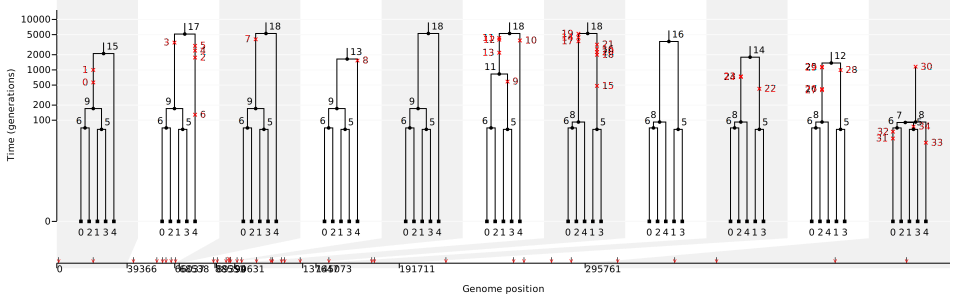

In [22]:
# Simplify ts to retain only the ancestry of samples 5..9
simple_ts = ts.simplify(samples=[5, 6, 7, 8, 9])  # This loses lots of information, but allows nicer plots
print()

svg_text = simple_ts.draw_svg(
    x_lim=(0, 500_000),  # can now show half a megabase
    size=(970, 300),
    time_scale="log_time",
    y_axis=True,
    y_ticks=[0, 100, 200, 500, 1000, 2000, 5000, 10000],
    y_gridlines=True,
    root_svg_attributes={"class": workshop.small_class},
    style=workshop.small_style,
)

display(SVG(svg_text))

## Metadata

When either deleting genealogical data or simplifying, you are likely to remove some nodes, edges, sites, and mutations. In turn this means that many of the IDs in the tree sequence can changed (for example the sample node IDs have changed in the simplified tree sequence above). If you ever expect to use a modified version of a tree sequence, you can't rely on the IDs of nodes, sites, etc. staying the same.

For this reason, `tskit` allows arbitrary *metadata* to be associated with entities in a tree sequence. For example, variable sites might have a unique name, such as a reference SNP ("rs") ID. A detailed description of metadata in `tskit` is provided in the metadata [documentation](https://tskit.dev/tskit/docs/stable/metadata.html) and [tutorial](https://tskit.dev/tutorials/metadata.html). This workshop merely scratches the surface of what is possible.


As we are about to see, one particularly helpful use of metadata is to allocate names to *individuals* in a tree sequence.

## Individuals

Often nodes (particularly sample nodes) are associated with *individuals* who have had their genomes sequenced. In many cases, individual organisms are diploid, hence each sequenced organism provides *two* sample nodes or genomes (one maternal and one paternal). It can be helpful not only to associate a sample node with an individual, but also to give the individuals *names* (stored in the individuals' metadata).

In [23]:
# This is a very useful way to get the IDs of the sample nodes
sample_node_ids = ts.samples()

# Here we print out the information for each sample node
for node_id in sample_node_ids:
    print(ts.node(node_id))

Node(id=0, flags=1, time=0.0, population=0, individual=0, metadata=b'')
Node(id=1, flags=1, time=0.0, population=0, individual=0, metadata=b'')
Node(id=2, flags=1, time=0.0, population=0, individual=1, metadata=b'')
Node(id=3, flags=1, time=0.0, population=0, individual=1, metadata=b'')
Node(id=4, flags=1, time=0.0, population=0, individual=2, metadata=b'')
Node(id=5, flags=1, time=0.0, population=0, individual=2, metadata=b'')
Node(id=6, flags=1, time=0.0, population=0, individual=3, metadata=b'')
Node(id=7, flags=1, time=0.0, population=0, individual=3, metadata=b'')
Node(id=8, flags=1, time=0.0, population=0, individual=4, metadata=b'')
Node(id=9, flags=1, time=0.0, population=0, individual=4, metadata=b'')
Node(id=10, flags=1, time=0.0, population=0, individual=5, metadata=b'')
Node(id=11, flags=1, time=0.0, population=0, individual=5, metadata=b'')
Node(id=12, flags=1, time=0.0, population=0, individual=6, metadata=b'')
Node(id=13, flags=1, time=0.0, population=0, individual=6, me

You can see from the output that node 0 is associated with individual 0, while (say) node 10 is associated with individual 5. We can look at the these individual ids in the individuals table:

<dl><dt>Exercise 5</dt>
<dd>Display the individuals table for the original tree sequence</dd>
</dl>

In [24]:
# Exercise 5: Display the individuals table


In [25]:
workshop.Q5()

In the case above, the individual's metadata is stored in a Python dictionary, with a <code>name</code> key. The name of (say) individual 7 can therefore be obtained from the metadata by <code>ts.individual(7).metadata["name"]</code>

<div class="alert alert-block alert-info"><b>Tip:</b>
    Metadata can be used, for example, to label the sample nodes in a tree by the name of the individual from whom they came. An example of this is provided in the <a href="https://tskit.dev/tutorials/terminology_and_concepts.html#individuals-and-populations">online tutorials</a>.</div>

## Processing variants

When dealing with genomic data, it is common to want to move along the genome, looking at the genetic variation at a number of variable sites. Often there are thousands or millions of variable sites along the genome, so instead of dealing with the variation in all the sites at once, we treat them one-by-one along the genome.


The <code>tskit</code> library gains efficiency in storage and processing by using the trees along the genome to effectively *compress* genetic variation data. The tree sequence `.variants()` method iterates over all the sites in the tree sequence, decoding the genetic variation at each site, which is returned as a `genotypes` array.

<dl><dt>Exercise 6</dt>
    <dd>Use the <a href="https://tskit.dev/tskit/docs/stable/python-api.html#tskit.TreeSequence.variants">.variants()</a> method to iterate over the 15 variable sites in <code>ts</code>, and print out the <code>.genotypes</code> attribute of each variant in turn. </dd></dl>

In [26]:
# Exercise 6: iterate over all the variants in `ts`, printing out the genotypes at each site


In [27]:
workshop.Q6()

As you can see, for efficiency the `genotypes` array is just a list of numbers, rather than the ATCG bases of a DNA sequence. Often this is enough for analysis, but you want the actual *alleles*, you need to use these numbers as an index into the `alleles` list, which is also provided for each site

In [28]:
import numpy as np
first_variant = next(deleted_data_ts.variants())

site = first_variant.site
genotypes = first_variant.genotypes
allele_array = np.array(first_variant.alleles)

print(f"Variation at first site (position {site.position}) is:")
print(allele_array[genotypes])

print("\n... or more verbosely\n")
for sample_id, genotype in zip(deleted_data_ts.samples(), genotypes):
    node = deleted_data_ts.node(sample_id)
    individual = deleted_data_ts.individual(node.individual)
    print(
        f"Sample node {sample_id} from individual {node.individual} "
        f"({individual.metadata['name']}) has allele {allele_array[genotype]}"
    )

Variation at first site (position 409347.0) is:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'G' 'A' 'A'
 'A' 'A']

... or more verbosely

Sample node 0 from individual 0 (Ada) has allele A
Sample node 1 from individual 0 (Ada) has allele A
Sample node 2 from individual 1 (Bob) has allele A
Sample node 3 from individual 1 (Bob) has allele A
Sample node 4 from individual 2 (Cat) has allele A
Sample node 5 from individual 2 (Cat) has allele A
Sample node 6 from individual 3 (Dee) has allele A
Sample node 7 from individual 3 (Dee) has allele A
Sample node 8 from individual 4 (Eli) has allele A
Sample node 9 from individual 4 (Eli) has allele A
Sample node 10 from individual 5 (Fi) has allele A
Sample node 11 from individual 5 (Fi) has allele A
Sample node 12 from individual 6 (Guy) has allele A
Sample node 13 from individual 6 (Guy) has allele A
Sample node 14 from individual 7 (Hal) has allele A
Sample node 15 from individual 7 (Hal) has allele G
Sample node 16 from indiv

However, most of the time you don't actually need to use `.variants()` directly: `tskit` provides functions to analyse genetic variation data without decoding the genotypes. This usually involves iterating over the trees in the tree sequence, which can be done very efficiently, as we shall see in the next section.

<div class="alert alert-block alert-info"><b>Note:</b>
    In fact, under the hood, processing variants in <code>tskit</code> is efficient because of the rapidity with which it is possible to iterate over all the trees in a tree sequence, even for enormous trees.</div>


## Processing trees

When we plotted trees at two different genomic positions, they looked quite different. This could indicate different sorts of history for different regions of the genome. One way to investigate this is to look at how the trees change along the genome.

A common idiom that underlies many tree sequence algorithms involves moving along the genome by
iterating over all of its [Trees](https://tskit.dev/tskit/docs/stable/python-api.html#tskit.Tree). 
To do this you use the
[.trees](https://tskit.dev/tskit/docs/stable/python-api.html#tskit.TreeSequence.trees) method. Because trees in a tree sequence are correlated, it is very efficent to move from one tree to an adjacent tree in this way (much more efficent than accessing `tree[0]` then `tree[1]`, then `tree[2]` etc.)

In [29]:
for tree in ts.trees():
    print(f"Tree {tree.index} has a root at time {ts.node(tree.root).time} and covers {tree.interval}")

Tree 0 has a root at time 2108.0062486338006 and covers Interval(left=0.0, right=39366.0)
Tree 1 has a root at time 5133.8987188755245 and covers Interval(left=39366.0, right=66037.0)
Tree 2 has a root at time 5267.751078473658 and covers Interval(left=66037.0, right=68538.0)
Tree 3 has a root at time 1642.5979101035928 and covers Interval(left=68538.0, right=88551.0)
Tree 4 has a root at time 5267.751078473658 and covers Interval(left=88551.0, right=89394.0)
Tree 5 has a root at time 5267.751078473658 and covers Interval(left=89394.0, right=99631.0)
Tree 6 has a root at time 5267.751078473658 and covers Interval(left=99631.0, right=137647.0)
Tree 7 has a root at time 3656.7093456281104 and covers Interval(left=137647.0, right=141520.0)
Tree 8 has a root at time 3656.7093456281104 and covers Interval(left=141520.0, right=145073.0)
Tree 9 has a root at time 1786.6709474716697 and covers Interval(left=145073.0, right=180647.0)
Tree 10 has a root at time 1786.6709474716697 and covers Inte

Here's an example of plotting the time of the root along the genome

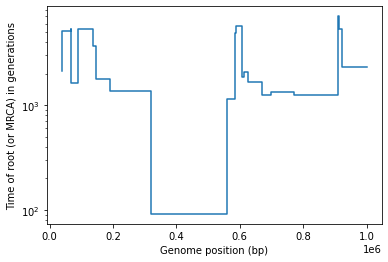

In [30]:
import matplotlib.pyplot as plt

xy_tuples = [
    (tree.interval.right, ts.node(tree.root).time)
    for tree in ts.trees()
]
plt.step(*zip(*xy_tuples))  # uses `zip` to change (x1,y1), (x2,y2), ... into (x1, x2, ...), (y1, y2, ...)
plt.xlabel("Genome position (bp)")
plt.ylabel(f"Time of root (or MRCA) in {ts.time_units}")
plt.yscale("log")

<dl><dt>Exercise 7</dt>
<dd>Copy and paste the code above, then change it to plot the total branch length of each tree instead of the time of the root node.

<div class="alert alert-block alert-info">
    <b>Tip:</b> Use the <code>Tree.total_branch_length</code> property. Also, you don't need to reimport matplotlib.pyplot. The plot should look very similar, because trees with recent root nodes are likely to have a short total branch length.</div></dd></dl>


In [31]:
# Exercise 7: plot the total branch length of the trees along the genome


It seems like that there might be something unusual about the trees in the middle of this
chromosome: both the root node time and the total branch length are noticably smaller around 400Kb into the sequence. We can investigate this using various built-in statistics.

## Built-in statistics

If you are calculating statistics along the genome, the `tskit` library provides methods for you. This can avoid the need to explicitly iterate over trees by hand. Methods include, for example, the average proportion of variable sites along the genome:

In [32]:
print(
    "Proportion of sites over whole genome:",
    ts.num_sites / ts.sequence_length,
    "(NB: this counts *all* defined sites, not just variable ones)" 
)
print(
    "Equivalent statistical calculation:",
    ts.segregating_sites(),
    "(This is better as it only counts variable sites)"
)

Proportion of sites over whole genome: 9.9e-05 (NB: this counts *all* defined sites, not just variable ones)
Equivalent statistical calculation: 9.8e-05 (This is better as it only counts variable sites)


In [33]:
# Another advantage of the built-in stats framework is that stats can be output in windows along the genome
import numpy as np
window_locations, step = np.linspace(0, ts.sequence_length, num=21, retstep=True)
site_density = ts.segregating_sites(windows=window_locations)
print(site_density)

[8.0e-05 1.8e-04 1.8e-04 1.0e-04 6.0e-05 8.0e-05 4.0e-05 6.0e-05 6.0e-05
 6.0e-05 2.0e-05 1.6e-04 1.2e-04 8.0e-05 8.0e-05 1.0e-04 4.0e-05 1.4e-04
 2.2e-04 1.0e-04]


<dl><dt>Exercise 8</dt><dd>Use <code>plt.stairs(site_density, window_locations, ...)</code> to plot the density of variable sites over the genome in windows.
<div class="alert alert-block alert-info">
<b>Tip:</b> It will look a little nicer if you get rid of the vertical lines at the start and end of the plot by specifing <code>baseline=None</code></div></dd></dl>

In [34]:
# Exercise 8: plot the density of variable sites in fixed-sized windows along the genome


### A duality between branch lengths and site variation

You may have noticed that the plot above looks pretty similar to the previous ones. That highlights an important point. If most mutations are neutral, and they occur randomly in time, then the number of mutations in a tree is determined by the total branch length in the tree: the more branches, or the longer each branch, the more mutations are likely to be observed. 

Moreover, when mutations are rare, each mutation results in a new variable site. So the proportion of variable sites can be thought of as an estimate of total branch length. In `tskit`, we can switch to this "branch length" version of the statistic by using the `mode` parameter, which defaults to `"site"` but can be set instead to `"branch"`.

In other words, the total branch length is a *genealogical equivalent* of the density of variable sites. In `tskit`, both can be obtained using the `segregating_sites()` statistical method, illustrated below

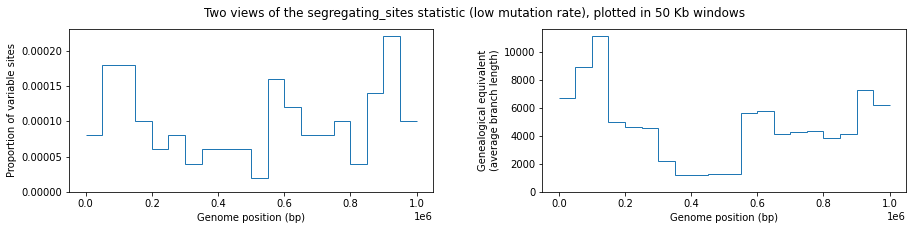

In [35]:
# Use the branch length as the statistic
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)
site_density = ts.segregating_sites(windows=window_locations)
branch_length = ts.segregating_sites(windows=window_locations, mode="branch")

# Same as the previous plot
ax1.stairs(site_density, window_locations, baseline=None)
ax1.set_xlabel("Genome position (bp)")
ax1.set_ylabel(f"Proportion of variable sites")

# Genealogical equivalent (mode="branch")
ax2.stairs(branch_length, window_locations, baseline=None)
ax2.set_xlabel("Genome position (bp)")
ax2.set_ylabel(f"Genealogical equivalent\n(average branch length)")

plt.suptitle(
    "Two views of the segregating_sites statistic (low mutation rate)"
    f", plotted in {step/1000:.0f} Kb windows")

plt.show()

<dl><dt>Exercise 9</dt>
<dd>As the number of mutations increases, the left hand plot should become more and more like the right hand one. We can test this by using <code>msprime.sim_mutations</code> (described in a later workshop) to overlay huge numbers of neutral mutations onto the tree sequence. You should try this below

<div class="alert alert-block alert-info">
    <b>Note:</b> If you specify <code>windows=ts.breakpoints(as_array=True)</code> (or the shorthand <code>windows="trees"</code>) then you will reproduce the plot you made in Exercise 7.</div>
</dd></dl>

In [36]:
import msprime
mutation_rate = 5e-6  # Higher than the human average of ~1e-8
high_mutation_ts = msprime.sim_mutations(ts, rate=mutation_rate, random_seed=123)

# Exercise 9: illustrate that with high mutation rate, the density of variable sites tends
# to the average branch length statistic. Do this by using the same plotting code as in the
# previous code cell, but substituting `high_mutation_ts` for `ts`.


Another basic statistic is the genetic diversity of a set of sequences, which measures the average genetic difference between all pairs of samples in your dataset. Here's an example of plotting that over the genome:

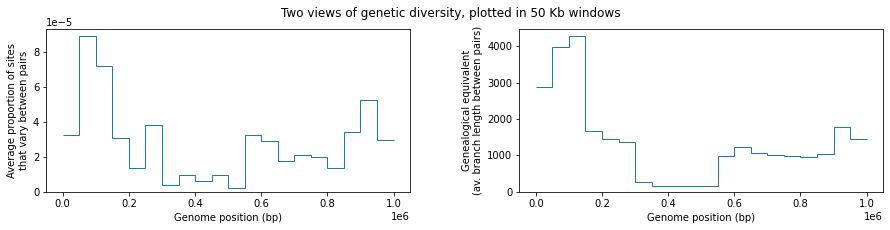

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)

window_locations, step = np.linspace(0, ts.sequence_length, num=21, retstep=True)
diversity_site = ts.diversity(windows=window_locations)
diversity_branch = ts.diversity(windows=window_locations, mode="branch")

ax1.stairs(diversity_site, window_locations, baseline=None)
ax1.set_xlabel("Genome position (bp)")
ax1.set_ylabel(f"Average proportion of sites\nthat vary between pairs")

# Genealogical equivalent (mode="branch")
ax2.stairs(diversity_branch, window_locations, baseline=None)
ax2.set_xlabel("Genome position (bp)")
ax2.set_ylabel(f"Genealogical equivalent\n(av. branch length between pairs)")

plt.suptitle(f"Two views of genetic diversity, plotted in {step/1000:.0f} Kb windows")

plt.show()

<dl><dt>Exercise 10</dt>
<dd>The difference between the proportion of segregating sites and the genetic diversity, suitably scaled, is known as *Tajima's D*, which under neutral expectations, and a constant population size, is expected to be zero on average. It is available as the <code>.Tajimas_D()</code> statistic.

Copy and paste the code above, then change it to plot Tajima's D, additionally using <code>.axhline(0, linestyle=":")</code> to show a dotted horizontal line at zero.

<div class="alert alert-block alert-info">
    <b>Note:</b> A large number of other statistics are available in tskit, as described <a href="https://tskit.dev/tskit/docs/stable/stats.html">here</a></div>
</dd></dl>

In [38]:
# Exercise 10: plot Tajima's D in windows along the genome


### The Allele Frequency Spectrum (AFS)

Many population genetic statistics are based on the allele frequency spectrum (AFS), that is, the number of alleles found in just one sample (singletons), the number in two samples (doubletons), in three (tripletons) etc. This also has a branch-length interpretation: Not many mutations, and those that do exist are at low frequency

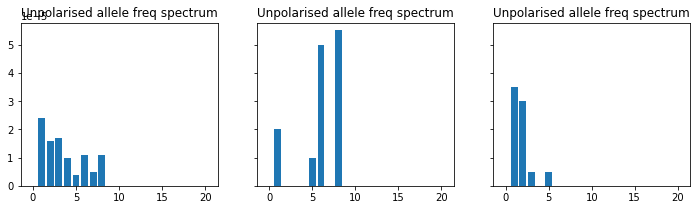

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)

afs = ts.allele_frequency_spectrum()
ax1.bar(range(ts.num_samples + 1), afs)
ax1.set_title("Unpolarised allele freq spectrum")


afs = ts.keep_intervals([[0, 200_000]]).trim().allele_frequency_spectrum()
ax2.bar(range(ts.num_samples + 1), afs)
ax2.set_title("Unpolarised allele freq spectrum")

afs = ts.keep_intervals([[400_000, 600_000]]).trim().allele_frequency_spectrum()
ax3.bar(range(ts.num_samples + 1), afs)
ax3.set_title("Unpolarised allele freq spectrum")


plt.show()

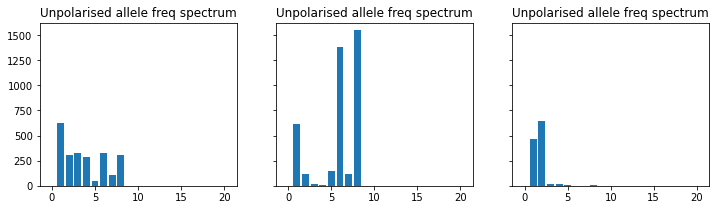

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)

afs = ts.allele_frequency_spectrum(mode="branch")
ax1.bar(range(ts.num_samples + 1), afs)
ax1.set_title("Unpolarised allele freq spectrum")


afs = ts.keep_intervals([[0, 200_000]]).trim().allele_frequency_spectrum(mode="branch")
ax2.bar(range(ts.num_samples + 1), afs)
ax2.set_title("Unpolarised allele freq spectrum")

afs = ts.keep_intervals([[400_000, 600_000]]).trim().allele_frequency_spectrum(mode="branch")
ax3.bar(range(ts.num_samples + 1), afs)
ax3.set_title("Unpolarised allele freq spectrum")


plt.show()



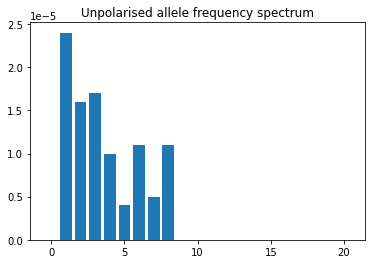

In [41]:
afs = ts.allele_frequency_spectrum()
plt.bar(np.arange(ts.num_samples + 1), afs)
plt.title("Unpolarised allele frequency spectrum")
plt.show()

By default this method returns the "folded" or unpolarized AFS that doesn't
{ref}`take account of the ancestral state<tskit:sec_stats_polarisation>`.
However, since the tree sequence provides the ancestral state, we can plot the polarized
version; additionally we can base our calculations on branch lengths rather than alleles,
which provides an estimate that is not influenced by random mutational "noise".

ValueError: Intervals must be within 0 and 1000000.0

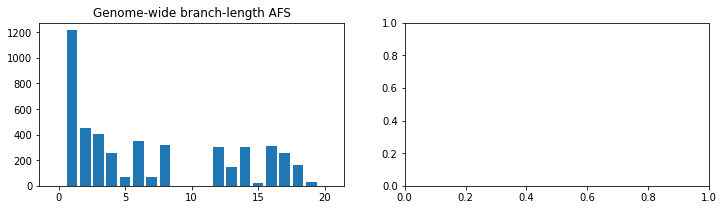

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3))

afs1 = ts.allele_frequency_spectrum(polarised=True, mode="branch")
ax1.bar(np.arange(ts.num_samples+1), afs1)
ax1.set_title("Genome-wide branch-length AFS")

restricted_ts = ts.keep_intervals([[5e6, 5.5e6]])
afs2 = restricted_ts.allele_frequency_spectrum(polarised=True, mode="branch")
ax2.bar(np.arange(restricted_ts.num_samples+1), afs2)
ax2.set_title("Branch-length AFS between 5 and 5.5Mb")

plt.show()


## Saving and exporting data

Tree sequences can be efficiently saved to file using `.dump`, and
loaded back again using `tskit.load`. By convention, we use the suffix ``.trees``
for such files:

In [ ]:
ts.dump("data/my_tree_sequence.trees")
new_ts = tskit.load("data/my_tree_sequence.trees")

It's also possible to export tree sequences to different formats. Note, however, that
not only are these usually much larger files, but that analysis is usually much faster
when performed by built-in tskit functions than by exporting and using alternative
software. If you have a large tree sequence, you should *try to avoid exporting
to other formats*.

### Newick and Nexus format

The most common format for interchanging tree data is Newick. 
We can export to a newick format string quite easily. This can be useful for
interoperating with existing tree processing libraries but is very inefficient for
large trees. There is also no support for including sites and mutations in the trees.

In [ ]:
tree = ts.first()
print(tree.newick(precision=3))

For an entire set of trees, you can use the Nexus file format, which acts as a container
for a list of Newick format trees, one per line:

In [ ]:
print(simple_ts.as_nexus(precision=3, include_alignments=False))

### VCF

The standard way of interchanging genetic variation data is the Variant Call Format, 
for which tskit has basic support:

<div class="alert alert-block alert-info"><b>Note:</b>
The write_vcf method takes a file object as a parameter; to get it to write out to the
notebook here we ask it to write to stdout.</div>

In [ ]:
import sys
simple_ts.write_vcf(sys.stdout)

(sec_tskit_getting_started_key_points)=

## Key points covered above

Some simple methods and take-home messages from this introduction to the
{program}`tskit` {ref}`sec_python_api`,
in rough order of importance:

* Objects and their attributes
    * In Python, a {class}`TreeSequence` object has a number of basic attributes such as
        {attr}`~TreeSequence.num_trees`, {attr}`~TreeSequence.num_sites`,
        {attr}`~TreeSequence.num_samples`, {attr}`~TreeSequence.sequence_length`, etc.
        Similarly a {class}`Tree` object has e.g. an {attr}`~Tree.interval` attribute, a
        {class}`Site` object has a {attr}`~Site.mutations` attribute, a {class}`Node`
        object has a {attr}`~Node.time` attribute, and so on.
    * {ref}`sec_terminology_nodes` (i.e. genomes) can belong to
        {ref}`individuals<sec_terminology_individuals_and_populations>`. For example,
        sampling a diploid individual results in an {class}`Individual` object which
        possesses two distinct {ref}`sample nodes<sec_terminology_nodes_samples>`.
* Key tree sequence methods
    * {meth}`~TreeSequence.samples()` returns an array of node IDs specifying the
        nodes that are marked as samples
    * {meth}`~TreeSequence.node` returns the node object for a given integer node ID
    * {meth}`~TreeSequence.trees` iterates over all the trees
    * {meth}`~TreeSequence.sites` iterates over all the sites
    * {meth}`~TreeSequence.variants` iterates over all the sites with their genotypes
        and alleles
    * {meth}`~TreeSequence.simplify()` reduces the number of sample nodes in the tree
        sequence to a specified subset
    * {meth}`~TreeSequence.keep_intervals()` (or its complement,
        {meth}`~TreeSequence.delete_intervals()`) removes genetic information from
        specific regions of the genome
    * {meth}`~TreeSequence.draw_svg()` plots tree sequences (and {meth}`Tree.draw_svg()`
        plots trees)
    * {meth}`~TreeSequence.at()` returns a tree at a particular genomic position
        (but using {meth}`~TreeSequence.trees` is usually preferable)
    * Various population genetic statistics can be calculated using methods on a tree
        sequence, for example {meth}`~TreeSequence.allele_frequency_spectrum`,
        {meth}`~TreeSequence.diversity`, and {meth}`~TreeSequence.Fst`; these can
        also be calculated in windows along the genome.